## **Резюме и результаты**

- Хронометраж с Джимом - 3 мин. 46 секунд.
- Ссылка на ролик по итогам работы модели и кода:
https://cloud.mail.ru/public/rGwQ/Z8dsNG9L1
- Срок работы кода, примерно 1 час на тестовом видео фрагменте.
- Итоговые используемые технологии:
haarCascade + Face_recognition (dlib) от Adam Geitgey.
- Ссылка на Colab:
https://colab.research.google.com/drive/1HvpBALuBHmOLCDvt9hF-ktEdlRp93j1R?usp=sharing

## **Логика решения задачи:**

- Создание видео фрагмента в видео редакторе. 
Видео фрагмент должен быть короткий, для скорости тестировани.
Должен быть с множеством лиц в одном кадре
Должен быть с разными ситуациями и эмоциями Джима, для качества тестирования.

- Покадровый анализ видео потока. Анализ изображения на Фейсдетект.
- Вырезание каждого фейса в отдельный клип. Складываени всех фейсов в один массив.
- Анализ каждого найденого фейса. Фейс Рекогнишен.
- Индикация клипов с фейсами и выделение кадра из видео, где есть Джим.
- Сохранение номеров изображений с Джимом для последующей склейки.
- Суммирование количества изображений из видео от УИИ. Определение общего хронометража с фейсами Джима Керри.
- Склейка и компиляция видео файла с фейсами Джима Керри.

# **Нюансы сравнения**
- Найти 10-15 изображений Джима керри для сравнения с ними.
- Оптимизировать изображения для ускорения работы кода (размер, сжатие изображения, поворот головы в вертикальное положение).
- Провести тестиривание на выборке, определить, какие изображения дают наиболее точные результаты в сравнении.
- Оставить только 1 изображения для сравнения, чтобы оптимизировать работу кода.

# **Оптимизация сжатия**
- Определяем оптимальное сжатие исходного кадра чтобы лица были различимы и скорость была оптимальной.
- При х4 сжатии видит только 220 лиц на тестовом периоде.
- При х2 сжатии видит 528 лиц на тестовом периоде.
- При х1 сжатии видит 880 лиц на тестовом периоде, 1 мин 36 секунд, весь ролик будет обрабатываться 1 час примерно, ТОЛЬКО на ФЕС ДЕТЕКШЕН!
Скороть падает пропорционально.
ПС: Сжатие дало негативный результат по качеству.

# **Особенности сбора базы**
- Особенностью решения данной задачи является, что Джим Керри, отличный актер и играет лицом очень изменчиво, что является повышенной сложностью задачи для Нейронки.
В интернете на всех фотграфиях Джим улыбается и почти всегда в одном ракурсе и хорошем свете.
Но мы будем осуществлять детекцию когда он играет в видео кадре, например в шоу трумена у него кадов с улыбкой значительно меньше, чем обычных эмоций.

- Для более точной детекции необходимо обогатить базу с разными фильмами с Джимом и вырезать фотографии из видео ряда с разными ракурсами, освещенностями и тд.

- Так же важно не перенасытить базу, что бы нейронка не реагировала на любое лицо как на Джима Керри.

## **Повышение шансов на победу - ЛайфХак**
- Часть конкурса составляет текущий видео ролик и хронометраж Джима в выданном отрезке.
Чтобы повысить шансы модели на определение лица Джима в текущем ролике и более корректно его посчитать, я могу выделить по 2-3 лица из разных сцен ролика и загрузить их в модель для обучения.
Это ухищрение позволит сделать данную часть задания более точно.


In [234]:
# Подключаем библиотеки
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

%matplotlib inline

from IPython.display import clear_output 

from PIL import Image

from numpy import savez_compressed
from numpy import asarray

import cv2
import os

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
 
import pickle

from keras.preprocessing.image import ImageDataGenerator

import numpy as np
from keras.preprocessing import image

In [235]:

from google.colab import drive # Подключаем гугл-диск
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [293]:
# Тестовый отрезок видео или полный

pathVideo = "/content/drive/MyDrive/Colab Notebooks/Конкурс УИИ/Shou_Truman.mp4"
#pathVideo = "/content/drive/MyDrive/Colab Notebooks/Конкурс УИИ/short_movie.mp4"

In [294]:
# Функция находит лицо и передает его в массив
# Face Detect

def load_faces_one(oneCLipFromVideo):
    faces_2 = list()
    
    param = 0

    faces = extract_face_Haar(oneCLipFromVideo)

    # сохраняем лица или лицо
    for i in faces:
      faces_2.append(i)
      param += 1
    
    #print("Всего найдено лиц - ",param)

    return faces_2

In [295]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/my_progs/haarcascade_frontalface_default.xml')

In [296]:
def extract_face_Haar(imagesFromVideo, required_size=(200, 200)):
      
    # загружаем картинки
      
      image_h = imagesFromVideo
      
      pixels = asarray(image_h)
    # создаем детектор лиц

      faces_Haar = face_cascade.detectMultiScale(image_h, 1.05, 6)

    # определяем лица
      
      faces = []

      arrClipFromVideo.append(len(faces_Haar))

      for i in range(len(faces_Haar)):
        x1, y1, width, height = faces_Haar[i]
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
      # берем лицо из картинки
        face = pixels[y1:y2, x1:x2]
      
        image_h = Image.fromarray(face)
        image_h = image_h.resize(required_size)
        face_array = asarray(image_h)

        faces.append(face_array)
        #cv2_imshow(face_array)

      #cv2_imshow(face_array)
      return faces

In [297]:
# Загружаем видео файл покадрово
cap = cv2.VideoCapture(pathVideo)
facesFromOnes = []
arrClipFromVideo = []
param = 0

if (cap.isOpened() == False): 
  print("Error opening video stream or file")

while cap.isOpened():
    ret, image_Opened = cap.read()

    if param%100 == 0:
      print("обработано ", param, " кадров")
    param += 1

    if not ret:
      break

    #gray = cv2.cvtColor(image_Opened, cv2.COLOR_BGR2GRAY)
    #arr.append(image_Opened)
    facesFromOnes.append(load_faces_one(image_Opened))

print("end read movie")
print("Всего кадро в распознано - ",len(facesFromOnes))
#facesFromOnes = np.array(facesFromOnes)
#print(facesFromOnes.shape)

# Преобразуем массив в длинну, вытягивая каждое распознаное лицо в отдельную ячейку
facesFromOnes_2 = []

for i in facesFromOnes:
  for j in i:
    facesFromOnes_2.append(j)

print("Всего распознано лиц - ",len(facesFromOnes_2))

print("массив с нумерацией лиц по кадрам, чтобы далее произвести соответствие - ", len(arrClipFromVideo))
print(arrClipFromVideo)

обработано  0  кадров
обработано  100  кадров
обработано  200  кадров
обработано  300  кадров
обработано  400  кадров
обработано  500  кадров
обработано  600  кадров
обработано  700  кадров
обработано  800  кадров
обработано  900  кадров
обработано  1000  кадров
обработано  1100  кадров
обработано  1200  кадров
обработано  1300  кадров
обработано  1400  кадров
обработано  1500  кадров
обработано  1600  кадров
обработано  1700  кадров
обработано  1800  кадров
обработано  1900  кадров
обработано  2000  кадров
обработано  2100  кадров
обработано  2200  кадров
обработано  2300  кадров
обработано  2400  кадров
обработано  2500  кадров
обработано  2600  кадров
обработано  2700  кадров
обработано  2800  кадров
обработано  2900  кадров
обработано  3000  кадров
обработано  3100  кадров
обработано  3200  кадров
обработано  3300  кадров
обработано  3400  кадров
обработано  3500  кадров
обработано  3600  кадров
обработано  3700  кадров
обработано  3800  кадров
обработано  3900  кадров
обработано  

In [298]:
print(facesFromOnes_2[0])

[[[ 13  32  43]
  [ 12  31  42]
  [ 11  30  41]
  ...
  [ 55  73  86]
  [ 56  74  87]
  [ 60  78  92]]

 [[ 12  31  42]
  [ 13  32  43]
  [ 13  32  43]
  ...
  [ 63  81 100]
  [ 58  76  95]
  [ 58  75  94]]

 [[ 11  30  41]
  [ 13  32  43]
  [ 15  34  45]
  ...
  [ 73  91 119]
  [ 64  81 108]
  [ 58  75 101]]

 ...

 [[ 11  27  41]
  [ 11  27  42]
  [ 11  28  44]
  ...
  [ 39  53  79]
  [ 48  62  89]
  [ 56  69  97]]

 [[  9  28  42]
  [  9  28  42]
  [ 10  29  43]
  ...
  [ 38  54  78]
  [ 46  63  87]
  [ 54  69  95]]

 [[  8  29  42]
  [  8  29  42]
  [  9  30  43]
  ...
  [ 37  55  77]
  [ 45  63  86]
  [ 52  69  94]]]


### **- Выделяем лица из каждого кадра и собиарем их в массив**

### **Сетка MTCNN**

In [243]:
!apt-get install build-essential cmake
!apt-get install libopenblas-dev liblapack-dev 
!pip3 install dlib
!pip3 install face_recognition

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
liblapack-dev is already the newest version (3.7.1-4ubuntu1).
libopenblas-dev is already the newest version (0.2.20+ds-4).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [244]:
!pip3 install mtcnn
!pip3 install opencv-contrib-python

from mtcnn.mtcnn import MTCNN

In [245]:
!ls -la face_recognition/tests/test_images/

ls: cannot access 'face_recognition/tests/test_images/': No such file or directory


### **Тестируем ХААР КАСКАД**

**Текст, выделенный полужирным шрифтом Тестирование показало, что Хаар каскад для задачи детекции лиц подходит гораздо лучше из-за высокой скорости и отсутствияю времени на MTCNN модель по детекции.
Хаар - 2 секунда 
MTCNN - 32 секунды на тестовом участке видео

Качественное сравнение ХаарКаскада и сети MTCNN не выявило значительного различия в обнаружении лиц.**

In [299]:
# Показываем заполнение массива маркировки кадров
#Кадрый идут в последовательности проигрывания, число в массиве обозначает, сколько лиц найдено в кадре

print(arrClipFromVideo)

print("количество кадров в тестовом отрывке - ",len(arrClipFromVideo))

print("всего лиц найдено - ", np.sum(arrClipFromVideo))

print(len(facesFromOnes))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 3, 2, 2, 2, 2, 2, 3, 2, 

In [300]:
import face_recognition

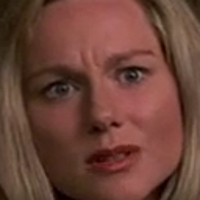

In [301]:
img = facesFromOnes_2[49]
cv2_imshow(img)

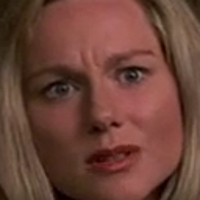

[False]


In [302]:
# тестирование системы распознования лица / Сравнение с лицом Джима Керри

img = facesFromOnes_2[49]
cv2_imshow(img)

known_image = face_recognition.load_image_file("/content/drive/MyDrive/Colab Notebooks/Конкурс УИИ/KnowImages/CorrectImages/jim_15.jpg")
unknown_image = np.array(img)

jim_encoding = face_recognition.face_encodings(known_image)[0]
recog = face_recognition.face_encodings(unknown_image)

if len(recog) == 0:
  print('лиц нет')
  results = False
else:
  unknown_encoding = recog[0]
  results = face_recognition.compare_faces([jim_encoding], unknown_encoding)

print(results)

In [303]:
# Функция выделения в массиве наиболее часто встречающегося значения

def mstfrqent(A): 
    counter = 0
    num = A[0] 

    for i in A: 
        curr_frequency = A.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 

    return num 

print(mstfrqent([1,1,1,1,0,0,0,10,10,10,10,10,10])) 

10


In [304]:
# Функция распознования лица

arrJims = ['jim_8.jpg']
#, 'jim_25.jpg', 'jim_33.jpg', 'jim_36.jpg', 'jim_47.jpg','jim_25.jpg', 'jim_26.jpg', 'jim_4.jpg', 'jim_25.jpg', 'jim_15.jpg', 'jim_5.jpg']

def jimFaces(img):

  localParam = []

  for i in range(len(arrJims)):
    known_image = face_recognition.load_image_file("/content/drive/MyDrive/Colab Notebooks/Конкурс УИИ/KnowImages/CorrectImages/" + arrJims[i])

    #img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    unknown_image = np.array(img)

    jim_encoding = face_recognition.face_encodings(known_image)[0]
    recog = face_recognition.face_encodings(unknown_image)

    if len(recog) == 0:
      #print('лиц нет')
      results = [False]
    else:
      unknown_encoding = recog[0]
      results = face_recognition.compare_faces([jim_encoding], unknown_encoding, 0.7)

    if results == [True]:
      results = True
    elif results == [False]:
      results = False

    localParam.append(results)

  finalResult = mstfrqent(localParam)

  #print("finalResult = ", finalResult)

  return finalResult

In [305]:
# Создаем массив маску, которая хранит номера лиц с Джимом

arrFacesJim = []

param = 0

for i in facesFromOnes_2:
  arrFacesJim.append(jimFaces(i))

  if param%100 == 0:
    print("сделано ", param, " лиц")
  param += 1

print(len(arrFacesJim))
print(arrFacesJim)
print("всего обнаружено Джимов Керри - ",countJim_func())

сделано  0  лиц
сделано  100  лиц
сделано  200  лиц
сделано  300  лиц
сделано  400  лиц
сделано  500  лиц
сделано  600  лиц
сделано  700  лиц
сделано  800  лиц
сделано  900  лиц
сделано  1000  лиц
сделано  1100  лиц
сделано  1200  лиц
сделано  1300  лиц
сделано  1400  лиц
сделано  1500  лиц
сделано  1600  лиц
сделано  1700  лиц
сделано  1800  лиц
сделано  1900  лиц
сделано  2000  лиц
сделано  2100  лиц
сделано  2200  лиц
сделано  2300  лиц
сделано  2400  лиц
сделано  2500  лиц
сделано  2600  лиц
сделано  2700  лиц
сделано  2800  лиц
сделано  2900  лиц
сделано  3000  лиц
сделано  3100  лиц
сделано  3200  лиц
сделано  3300  лиц
сделано  3400  лиц
сделано  3500  лиц
сделано  3600  лиц
сделано  3700  лиц
сделано  3800  лиц
сделано  3900  лиц
сделано  4000  лиц
сделано  4100  лиц
сделано  4200  лиц
сделано  4300  лиц
сделано  4400  лиц
сделано  4500  лиц
сделано  4600  лиц
сделано  4700  лиц
сделано  4800  лиц
сделано  4900  лиц
сделано  5000  лиц
сделано  5100  лиц
сделано  5200  лиц
сдела

In [306]:
print(len(arrFacesJim))
print(arrFacesJim)
print("всего обнаружено Джимов Керри - ",countJim_func())

31516
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, Tru

In [307]:
# Функция которая вычисляет номер кадра по номеру лица

def clipFromFace(numFace):
  #print(len(arrClipFromVideo))
  numClip = 0
  numClip_2 = 0

  for i in range(len(arrClipFromVideo)):
    if numClip >= numFace:
      break
    else:
      numClip += arrClipFromVideo[i]
      numClip_2 += 1

  return numClip_2

print(clipFromFace(22))

20


In [308]:
# Проверяем сколько лиц джима было обнаружено

def countJim_func():
  countJim = 0  

  for i in arrFacesJim:
    #print(i)


    if i == True:
      countJim += 1

  return countJim

In [309]:
# Считаем экранное время с Джимом

def countMinuts():
  print("Всего КАДРОВ с Джимом Керри - ",countJim_func(), " кадров в отрезке")
  print("Всего СЕКУНД с Джимом Керри - ",countJim_func()/24, " секунд в отрезке")
  print("Всего МИНУТ с Джимом Керри - ",countJim_func()/24/60, " минут в отрезке")

countMinuts()

Всего КАДРОВ с Джимом Керри -  5689  кадров в отрезке
Всего СЕКУНД с Джимом Керри -  237.04166666666666  секунд в отрезке
Всего МИНУТ с Джимом Керри -  3.9506944444444443  минут в отрезке


### **Создаем видео ролик из картинок с Джимом**

In [310]:
# тестируем создание видеоролика

video_name = 'videoWithJim_0.mp4'

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
#fourcc = cv2.VideoWriter_fourcc(*'X264')
#fourcc = cv2.VideoWriter_fourcc(*'avc1')
#fourcc = cv2.VideoWriter_fourcc(*'XVID')

video = cv2.VideoWriter(video_name, fourcc, 24, (720,408))

for image in arr[:100]:
    video.write(image)

cv2.destroyAllWindows()

video.release()

In [311]:
# функция возвращает массив из номеров кадров для склейки

arrClipWithJim = []

def arrClipWithJim_func():
  
  for i in range(len(arrFacesJim)):
    if arrFacesJim[i] == True:
      arrClipWithJim.append(clipFromFace(i))
  return arrClipWithJim

print(arrClipWithJim_func())
print('Длинна массива с номерами кадров - ', len(arrClipWithJim))

[77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 203, 203, 205, 207, 209, 210, 211, 212, 213, 214, 215, 216, 218, 218, 219, 220, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 384, 385, 386, 387, 388, 389, 390, 410, 419, 420, 421, 605, 606, 607, 608, 609, 610, 611, 612, 613, 61

In [312]:
# переделываем массив в маску

arrClipWithJim_2 = np.zeros(shape=len(arrClipFromVideo), dtype = np.int8)
#print(arrClipWithJim_2.shape)

def arrToMask():
  for i in arrClipWithJim:
    arrClipWithJim_2[i] = True

arrToMask()

print(arrClipWithJim_2.shape)
print(arrClipWithJim_2)

arrClipWithJim_2 = np.array(arrClipWithJim_2 == 1)

print(arrClipWithJim_2)
print(arrClipWithJim_2.shape)

(29624,)
[0 0 0 ... 0 0 0]
[False False False ... False False False]
(29624,)


In [313]:
print(arrClipWithJim)
print(len(arrClipWithJim))

[77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 203, 203, 205, 207, 209, 210, 211, 212, 213, 214, 215, 216, 218, 218, 219, 220, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 384, 385, 386, 387, 388, 389, 390, 410, 419, 420, 421, 605, 606, 607, 608, 609, 610, 611, 612, 613, 61

In [315]:
# Создаем видео ролик с Джимом

video_name = 'videoWithJim_TestFile_1_28.mp4'

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
#fourcc = cv2.VideoWriter_fourcc(*'XVID')

video = cv2.VideoWriter(video_name, fourcc, 24, (720,408))

# Загружаем видео файл покадрово
cap_after = cv2.VideoCapture(pathVideo)
p_after = 0

if (cap_after.isOpened() == False): 
  print("Error opening video stream or file")

while cap_after.isOpened():
    ret, image_Opened_2 = cap_after.read()

    if p_after in arrClipWithJim:
      #img = cv2.cvtColor(image_Opened_2,cv2.COLOR_GRAY2RGB)
      video.write(image_Opened_2)
    #print("p_after = ", p_after)
    
    #cv2_imshow(image_Opened_2)
    if not ret:
      break


    #print(p_after)
    p_after+=1

cv2.destroyAllWindows()

video.release()

print("Видео ролик с Джимом сохранен")

# Выводим количество экранного времени Джима в отрезке
countMinuts()

Видео ролик с Джимом сохранен
Всего КАДРОВ с Джимом Керри -  5689  кадров в отрезке
Всего СЕКУНД с Джимом Керри -  237.04166666666666  секунд в отрезке
Всего МИНУТ с Джимом Керри -  3.9506944444444443  минут в отрезке
